<a href="https://colab.research.google.com/github/codingpotato/pill-detection/blob/master/pill_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup Environment

# Prepare Data

In [0]:
!git clone https://github.com/codingpotato/pill-detection.git

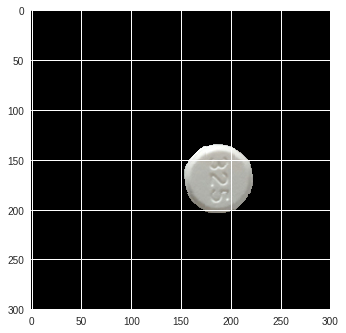

In [13]:
from PIL import Image
from random import randint
import matplotlib.pyplot as plt

image_prefix = 'pill-detection/images/'
image_size = (300, 300)

image = Image.new('RGB', image_size, '#000')
pill_image = Image.open(image_prefix + '325.png')
rotated_image = pill_image.rotate(randint(0, 359), expand=True)
x = randint(0, image_size[0] - rotated_image.size[0])
y = randint(0, image_size[1] - rotated_image.size[1])
image.paste(rotated_image, (x, y))
image.save(image_prefix + 'test.png')

plt.imshow(image)

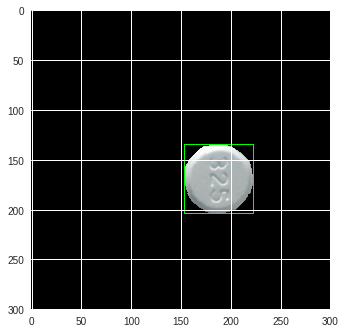

In [15]:
import cv2

image = cv2.imread(image_prefix + 'test.png')
image_bw = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, image_bw = cv2.threshold(image_bw, 1, 255, cv2.THRESH_BINARY)
_, contours, _ = cv2.findContours(image_bw, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

for cnt in contours:
  area = cv2.contourArea(cnt)
  if area > 200:
    x, y, w, h = cv2.boundingRect(cnt)
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 1)
cv2.imwrite(image_prefix + 'aa.png', image)
plt.imshow(image)

In [11]:
!ls pill-detection/images

325.jpg  325.png  500.jpg  500.png  test.png
